In [120]:
from cdt.data import AcyclicGraphGenerator
import networkx as nx
import matplotlib as plt
from matplotlib import pyplot as plt
import time
import numpy as np
from numpy import savetxt
from cdt.data import load_dataset
import pandas as pd
import os.path

import seaborn as sns

from cdt.metrics import retrieve_adjacency_matrix

In [146]:
data, graph = load_dataset('sachs')

In [147]:
data.head()

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.2,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.9,40.0
1,35.9,16.5,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.5,61.5
2,59.4,44.1,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.9,19.5
3,73.0,82.8,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.6,23.1
4,33.7,19.8,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.7,81.3


In [148]:
data = np.array(data)

In [149]:
np.mean(data[:,5])

26.631193410125903

In [150]:
np.max(data[:,5])

2571.0

In [73]:
"""
{'linear': LinearMechanism,
                          'polynomial': Polynomial_Mechanism,
                          'sigmoid_add': SigmoidAM_Mechanism,
                          'sigmoid_mix': SigmoidMix_Mechanism,
                          'gp_add': GaussianProcessAdd_Mechanism,
                          'gp_mix': GaussianProcessMix_Mechanism,
                          'nn': NN_Mechanism}[causal_mechanism]
"""

"\n{'linear': LinearMechanism,\n                          'polynomial': Polynomial_Mechanism,\n                          'sigmoid_add': SigmoidAM_Mechanism,\n                          'sigmoid_mix': SigmoidMix_Mechanism,\n                          'gp_add': GaussianProcessAdd_Mechanism,\n                          'gp_mix': GaussianProcessMix_Mechanism,\n                          'nn': NN_Mechanism}[causal_mechanism]\n"

In [74]:
#int(np.random.randint(3, size = (1)))

In [96]:
mechanism = 'sigmoid_add'


generator = AcyclicGraphGenerator(mechanism, nodes=20, parents_max=3,  noise_coeff=.4, npoints=10000)
data, graph = generator.generate()
generator.to_csv('generated_graph')
start_time = time.time()

#print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

In [97]:
run = 0
data_name = 'ArchivedData/Hidden_Var_Data/Complete_Data_' + str(mechanism) + '_' + str(run) + '.csv' 

while os.path.exists(data_name):
    run += 1
    data_name = 'ArchivedData/Hidden_Var_Data/Complete_Data_' + str(mechanism) + '_' + str(run) + '.csv' 

savetxt(data_name, data, delimiter=',')

In [98]:
#data, graph = load_dataset('dream4-1')
#data

In [99]:
true_matrix = retrieve_adjacency_matrix(graph)

In [100]:
run = 0
matrix_name = 'ArchivedData/Hidden_Var_Data/True_CM_' + str(mechanism) + '_' + str(run) + '.csv'

while os.path.exists(matrix_name):
    run += 1
    matrix_name = 'ArchivedData/Hidden_Var_Data/True_CM_' + str(mechanism) + '_' + str(run) + '.csv' 

savetxt(matrix_name, true_matrix, delimiter=',')

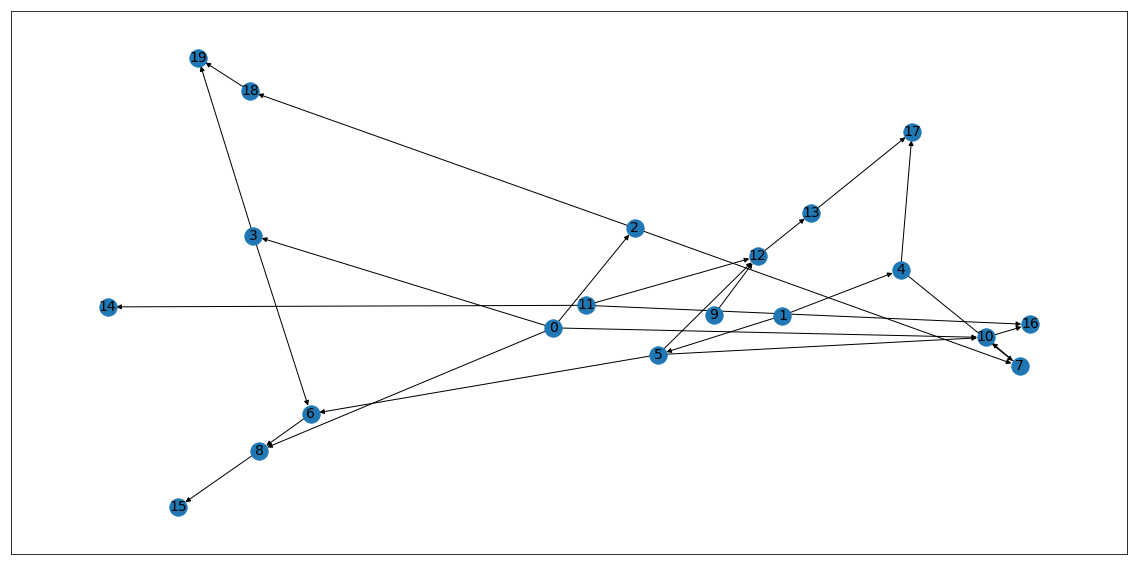

In [101]:
plt.figure(figsize=(20,10))
nx.draw_networkx(graph, font_size=14) # The plot function allows for quick visualization of the graph. 
plt.show()

In [102]:
n = len(data)
data = np.array(data)

for i in range(0,len(data.T)):
    data[:,i] = (data[:,i]-min(data[:,i]))/(max(data[:,i])-min(data[:,i]))

In [103]:
#data = pd.read_csv('combined.csv', header = None)

In [104]:
data.shape

(10000, 20)

In [105]:
to_remove = [0,3,6]

In [106]:
data = np.delete(data, to_remove, 1)

In [107]:
data.shape

(10000, 17)

In [108]:
data = data
data = np.array(data)

In [109]:
data = np.concatenate((np.ones(len(data)).reshape(-1,1), data), axis =1)
savetxt('combined.csv', data, delimiter=',')

In [110]:
data.shape

(10000, 18)

In [111]:
true_matrix = np.delete(true_matrix, to_remove, 1)

In [112]:
true_matrix = np.delete(true_matrix, to_remove, 0)

In [113]:
true_matrix.shape

(17, 17)

In [114]:
matrix_hidden = true_matrix

In [115]:
savetxt('true_CM.csv', matrix_hidden, delimiter=',')

In [116]:
run = 0
matrix_name = 'ArchivedData/Hidden_Var_Data/True_CM_hidden_' + str(mechanism) + '_' + str(run) + '.csv'

while os.path.exists(matrix_name):
    run += 1
    matrix_name = 'ArchivedData/Hidden_Var_Data/True_CM_hidden_' + str(mechanism) + '_' + str(run) + '.csv' 

savetxt(matrix_name, matrix_hidden, delimiter=',')





In [117]:
run = 0
file_name = 'ArchivedData/Hidden_Var_Data/combined_hidden_' + str(mechanism) + '_' + str(run) + '.csv' 

while os.path.exists(file_name):
    run += 1
    file_name = 'ArchivedData/Hidden_Var_Data/combined_hidden_' + str(mechanism) + '_' + str(run) + '.csv' 

savetxt(file_name, data, delimiter=',')